## PHASE 4 PROJECT : GROUP 10.
## Project Title: Time Series Modelling of Real Estate Prices.

## Team Members
1. Celiajoy Omiah
2. Crystal Wanjiru
3. Kelvin Rotich
4. Miriam Nguru
5. Paul Mbugua
6. Stephen Butiya



## Introduction
This project aims to construct a time series model leveraging Zillow's dataset to assist real estate investors in making well-informed investment decisions.


## Overview
In this project we aim to do the following:

1. Loading the dataset.
2. Gaining a comprehensive understanding of the dataset.
3. dentifying and selecting our target variable.
4. Preparing the dataset, which involves tasks such as cleaning, checking for multicollinearity, and ensuring data integrity.
5. Encoding categorical variables to make them compatible with our modeling process.
6. Building several models to explore different approaches.
7. Evaluating the performance of our models using appropriate metrics.
8. Utilizing our trained models for making predictions.
9. Drawing meaningful insights and conclusions based on our findings.

##  Business understanding
Real estate investment stands as a profitable and ever-evolving industry, demanding meticulous analysis and strategic decision-making. A fictitious real estate investment firm is currently in search of insights to pinpoint the top five zip codes offering promising investment opportunities. To tackle this inquiry, we leverage historical data sourced from Zillow Research.

##  Objectives
The objectives of this project:
* To identify the top 5 zip codes and states that offer the best investment potential in terms of real estate value. By analyzing historical trends and patterns, the project aims to provide actionable insights to the investment firm, enabling them to make informed decisions on where to allocate their resources.
* To analyze the historical data of the real estate value by looking into the monthly, quarterly, semi-annual and annual patterns over time.
* To create an ARIMA model that will be able to predict future Real Estate Value.




##  Data Understanding

The dataset encompasses details on a range of attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and the value representing real estate prices. This dataset, known as the Zillow Housing Dataset, has been obtained from the Zillow Research Page.

To gain an initial insight into the structure of our dataset, let's load and preview the data.

In [61]:
#Importing the data libraries
import numpy as np
import pandas as pd

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
# Function to load and examine the data

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset

        print("\n----------------------------Data information ----------------------------\n")
        display(data[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank']].info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# data file path
file_path = "zillow_data.csv" 
data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(14723, 272)


----------------------------Columns of the dataset----------------------------



Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)


----------------------------Head of the dataset----------------------------



,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    14723 non-null  int64 
 1   RegionName  14723 non-null  int64 
 2   City        14723 non-null  object
 3   State       14723 non-null  object
 4   Metro       13680 non-null  object
 5   CountyName  14723 non-null  object
 6   SizeRank    14723 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 805.3+ KB


None


----------------------------Descriptive Statistics of the dataset ----------------------------



,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


The dataset contains the following columns:
* Region Id - is unique ID for the Regions

* Region Name contains the zip code for the region

* City Specific city name of housing data

* Metro Name of the metro city around that region

* County Name this is the county name of that region

* SizeRank this is the ranking done based on the size of that region

* Date this refers to a point in time

## Data Preparation

The code in the cell below  creates a copy of a DataFrame named `data` called `data2`. It then calculates the Return On Investment (ROI) by dividing the values in the '2018-04' column by the values in the '1996-04' column and subtracting 1. The calculated ROI values are added as a new column named `Return On Investment` in the copied DataFrame.

In [63]:
# Create a copy of the original DataFrame
data2 = data.copy()

# Calculate Return On Investment and add a new column to the copied DataFrame
data2['Return On Investment'] = (data2['2018-04'] / data2['1996-04']) - 1

# Display the first few rows of the updated DataFrame
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Return On Investment
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [64]:
data2.sort_values(by='Return On Investment', ascending=False, inplace=True)

In [65]:
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Return On Investment
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,11.189940
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,10.535523
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,9.403061
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,8.941958


In [66]:
data_top5 = data2.head()

Selects specific columns, including `RegionID`, `RegionName`, `City`, `State`, `Metro`, `CountyName`, `SizeRank`, and `Return On Investment`, from the DataFrame `data2`, drops any columns not in this selection, and displays the first few rows of the updated DataFrame.

In [67]:
# Select specific columns from the DataFrame
columns_selected = data2[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Return On Investment']]

# Iterate through all columns in the DataFrame
for column in data2.columns:

    # Drop columns that are not in the selected list
    if column not in columns_selected:
        data2.drop(column, axis=1, inplace = True)
        
# Display the first few rows of the updated DataFrame
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Return On Investment
117,62022,11211,New York,NY,New York,Kings,118,11.189940
1155,62033,11222,New York,NY,New York,Kings,1156,10.535523
475,62027,11216,New York,NY,New York,Kings,476,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,9.403061
106,62026,11215,New York,NY,New York,Kings,107,8.941958


In [68]:
data2.shape

(14723, 8)

In this section, we define a function `data_prep` that performs checks for missing values, duplicated values, and placeholder values in the dataset.

In [69]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.
def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
        
# Checking in our dataset.
data_prep(data2)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
RegionID                   0
RegionName                 0
City                       0
State                      0
Metro                   1043
CountyName                 0
SizeRank                   0
Return On Investment    1039
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'RegionID'
Placeholders found: []
Count of placeholders: 0

Column: 'RegionName'
Placeholders found: []
Count of placeholders: 0

Column: 'City'
Placeholders found: []
Count of placeholders: 0

Column: 'State'
Placeholders found: []
Count of placeholders: 0

Column: 'Metro'
Placeholders found: []
Count of placeholders: 0

Column: 'CountyName'
Placeholders found: []
Count of placeholder

In [70]:
# Remove rows with missing values (NaN) from the DataFrame 'data2' in-place
data2.dropna(inplace = True)

# Display the count of missing values in each column after dropping NaN values
data2.isna().sum()

RegionID                0
RegionName              0
City                    0
State                   0
Metro                   0
CountyName              0
SizeRank                0
Return On Investment    0
dtype: int64

We write a function `check_outliers` to identify and print the number of outliers in numeric columns of a dataframe. 
It then selects numeric columns from `data2` using `select_dtypes` and calls the `check_outliers` with the specified DataFrame and columns.

In [71]:
#Checking for outliers
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        
# Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

#Call the function
columns_to_check = data2.select_dtypes(include = ['number'])
check_outliers(data2, columns_to_check)

RegionID
Number of outliers: 101

RegionName
Number of outliers: 0

SizeRank
Number of outliers: 0

Return On Investment
Number of outliers: 700



The code below generates a boxplot to visually inspect and identify potential outliers in the numeric columns of the DataFrame `data2`, providing a comprehensive overview of the distribution and variability of the data

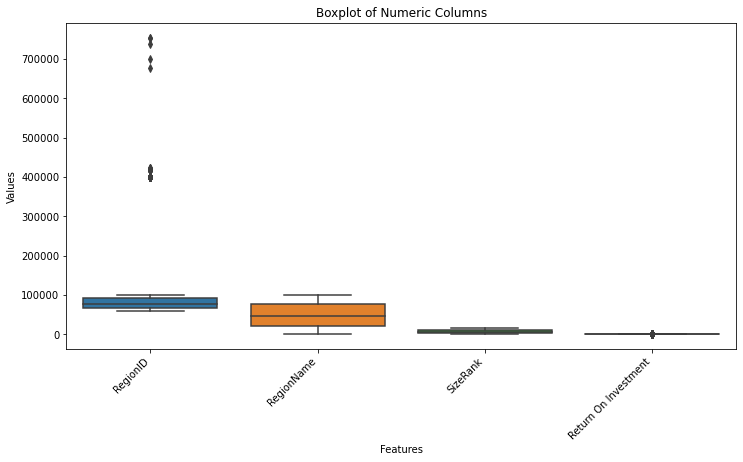

In [72]:
# Plotting a boxplot to check for outliers
features_to_plot = data2.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show()

The boxplots indicates there are outliers present but we cant drop them because they are actual events recorded.

The code below takes a wide-form dataframe (`df`) and melts it into a long-form DataFrame, converts the `Date` column to datetime format, drops rows with missing `value` entries, and finally returns a dataframe grouped by date with the mean value for each date.

In [73]:
#Melt Data Function
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    #Melt the DataFrame
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date')
    
    #Convert the 'Date' column to datatime format
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    
    #Drop rows with missing 'value' entries
    melted = melted.dropna(subset=['value'])

    #Group by 'Date' and calculate the mean of the 'value' column
    return melted.groupby('Date').aggregate({'value':'mean'})

The code below reshapes the DataFrame `data` using the pandas melt_data function and stores the result in a new DataFrame `data3`, providing an initial view of the reshaped data.

In [74]:
# Reshape the DataFrame 'data' using the 'melt_data' function and store the result in 'data3'
data3 = melt_data(data)

# Display the first few rows of the reshaped DataFrame 'data3'
data3.head()

,value
Date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [75]:
data3.shape

(265, 1)

In [76]:
# Call the 'data_prep' function to perform data preparation steps on the DataFrame 'data3'
data_prep(data3)


-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
value    0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'value'
Placeholders found: []
Count of placeholders: 0



In [77]:
data2['RegionName'] = data2['RegionName'].astype('str')

## Exprolatory Data Analysis

#### Univariate Analysis

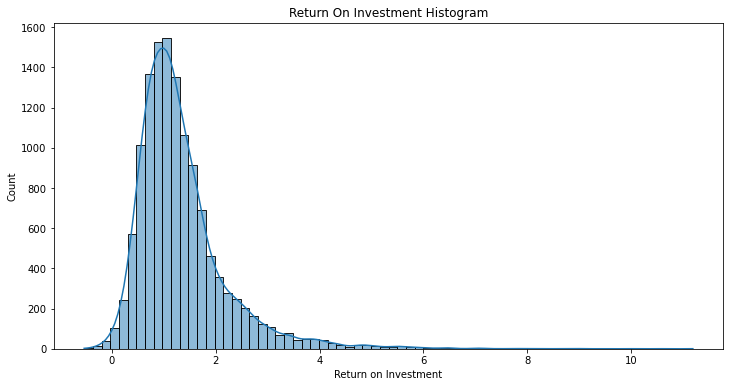

In [78]:
# A histogram of Returns on Investment
plt.figure(figsize=(12,6))
sns.histplot(data2['Return On Investment'], bins=70, kde=True)
plt.title('Return On Investment Histogram')
plt.xlabel('Return on Investment')
plt.show()

The returns on investment had a postive skewness.

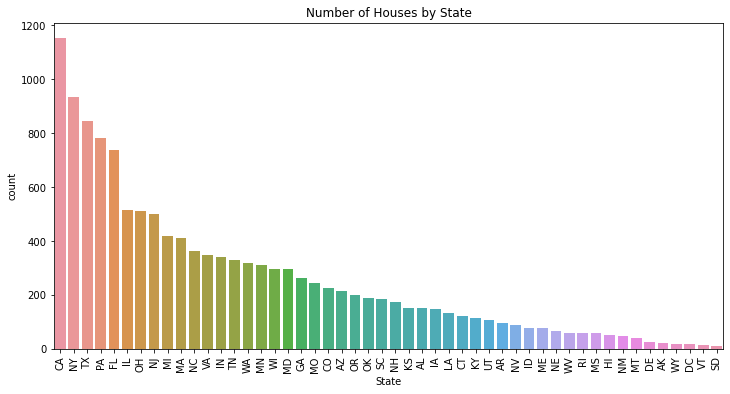

In [79]:
# Countplot for the number of houses by state
plt.figure(figsize=(12,6))
sns.countplot(data2['State'], order=data2['State'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number of Houses by State')
plt.show()

The number of houses was highest in California, New York, Texas, Pennsylvania, and Florida, respectively. The states with the least number of houses were South Dakota, Vermont, Washington DC, Wyoming, and Arkansas, respectively. 

#### Bivariate Analysis

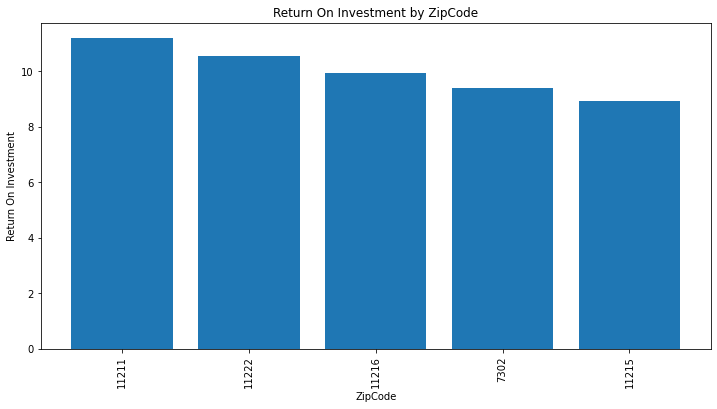

In [80]:
# Top five zipcodes with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][:5], data2['Return On Investment'][:5])
plt.xticks(rotation=90)
plt.title('Return On Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

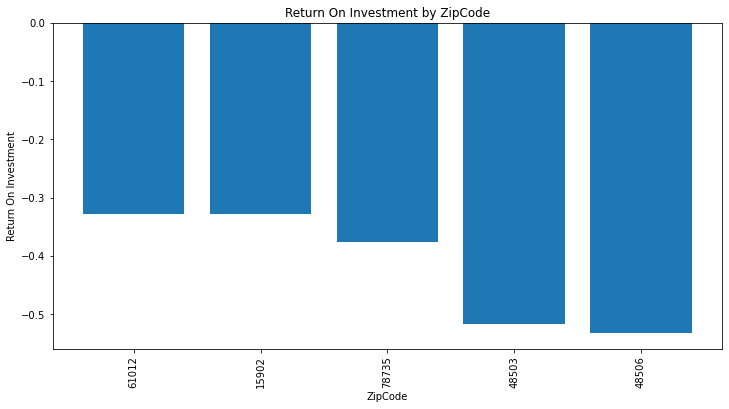

In [81]:
# Regions with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][-5:], data2['Return On Investment'][-5:])
plt.xticks(rotation=90)
plt.title('Return On Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

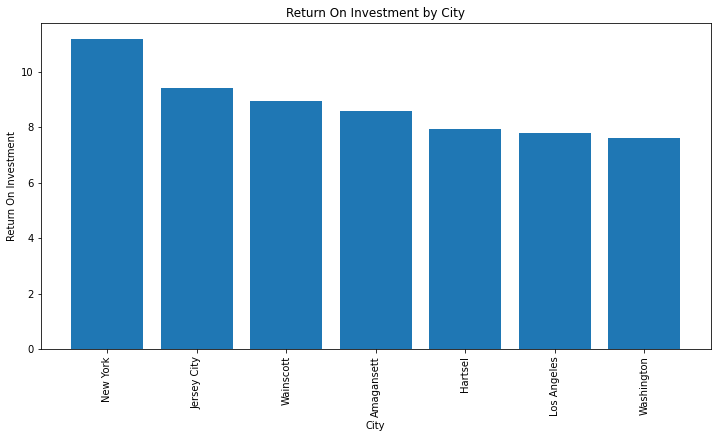

In [82]:
# Top five cities with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][:10], data2['Return On Investment'][:10])
plt.xticks(rotation=90)
plt.title('Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

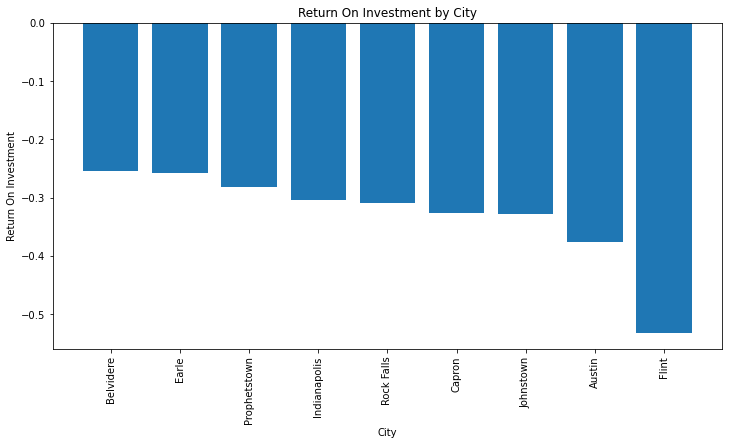

In [83]:
# Cities with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][-10:], data2['Return On Investment'][-10:])
plt.xticks(rotation=90)
plt.title('Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

The cities with the highest returns on investment are New York, Jersey City, Wainscott, Amagansett, Hartsell, Los Angeles, and Washington. However, the cities with the lowest returns on investment are Flint, Austin, Johnstown, Carpron, Rock Falls, Indianapolis, Prophetstown, Earle, and Belvidere. Now, proceeding to the best and worst performing states based on the returns on investment.

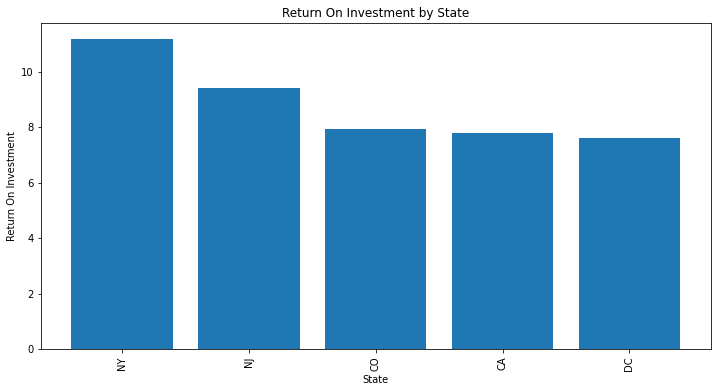

In [84]:
# Top five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][:10], data2['Return On Investment'][:10])
plt.xticks(rotation=90)
plt.title('Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

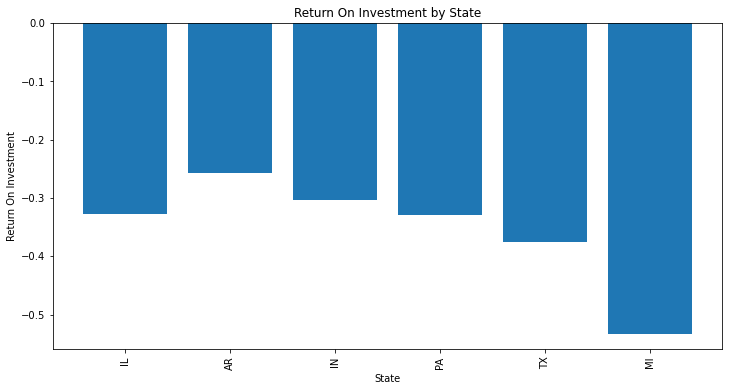

In [85]:
# Bottom five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][-10:], data2['Return On Investment'][-10:])
plt.xticks(rotation=90)
plt.title('Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

The states with the highest reurns on investment are New York, New Jersey, Colorado, California, and Washington DC. On the other hand, the states with the lowest returns on investment are Michigan, Texas, Pennsylvania, Indiana, Arkansas, and Illinois. We can go ahead and conduct time series analysis. 

### Time Series Analysis

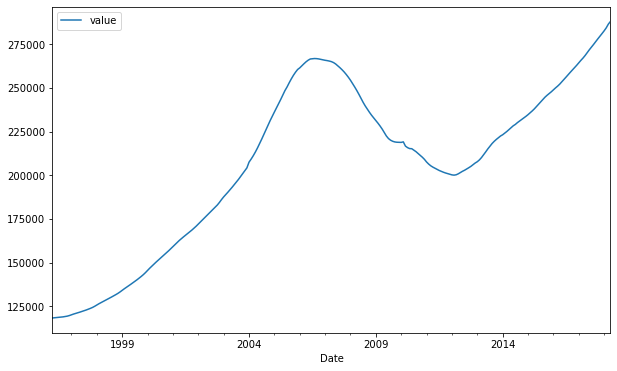

In [86]:
# Creating a line plot of the data
data3.plot(figsize=(10,6));

In [87]:
# Resampling
quarterly_df = data3.resample('Q').mean()
quarterly_df.head()

,value
Date,
1996-06-30,118418.530157
1996-09-30,118786.950697
1996-12-31,119383.652441
1997-03-31,120520.710319
1997-06-30,121659.059242


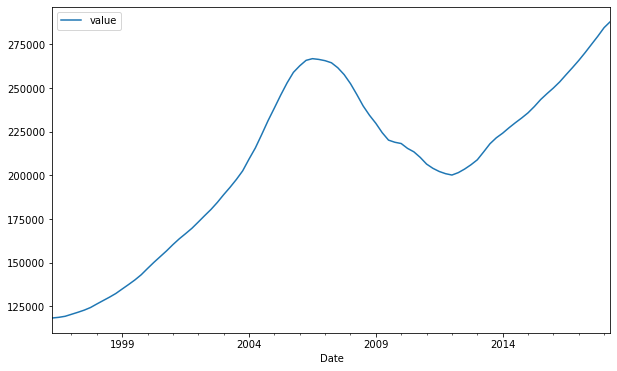

In [88]:
# Plotting data resampled quarterly
quarterly_df.plot(figsize=(10,6));

In [89]:
# Semi-annual resampling
semiannual_df = data3.resample('2Q').mean()
semiannual_df.head()

,value
Date,
1996-06-30,118418.530157
1996-12-31,119085.301569
1997-06-30,121089.884780
1997-12-31,123640.518816
1998-06-30,127404.630915


<AxesSubplot:xlabel='Date'>

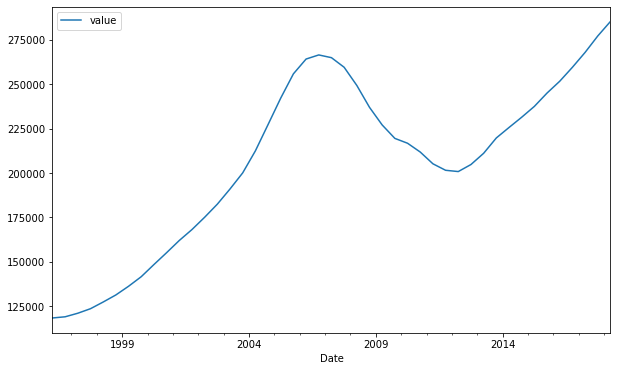

In [90]:
# Plotting data resampled semi-annually
semiannual_df.plot(figsize=(10,6))

In [91]:
# Annual Resampling
annual_df = data3.resample('Y').mean()
annual_df.head()

,value
Date,
1996-12-31,118863.044431
1997-12-31,122365.201798
1998-12-31,129392.784516
1999-12-31,138962.489345
2000-12-31,151834.752563


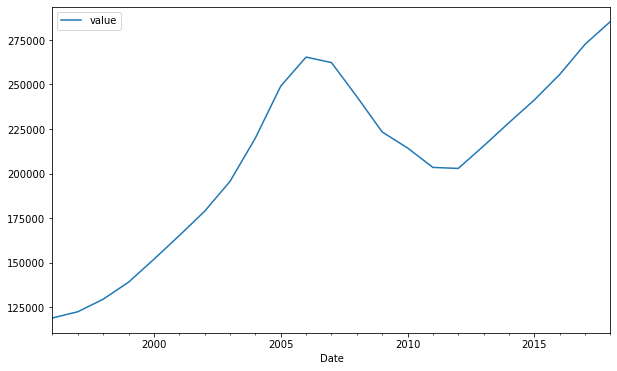

In [92]:
# A plot of data resampled annually
annual_df.plot(figsize=(10,6));

Based on the monthly, quarterly, semi-annual, and annual graphs, we can see that there is an upward trend from 1996 to 2018. However, there is a decrease between 2006 and 2013, which is attributed to the recession and the 2008 market crash. We can now look at the rolling statistics. 

In [93]:
# Rolling mean
roll_mean = data3.rolling(window=12, center=False).mean()
roll_std = data3.rolling(window=12, center=False).std()

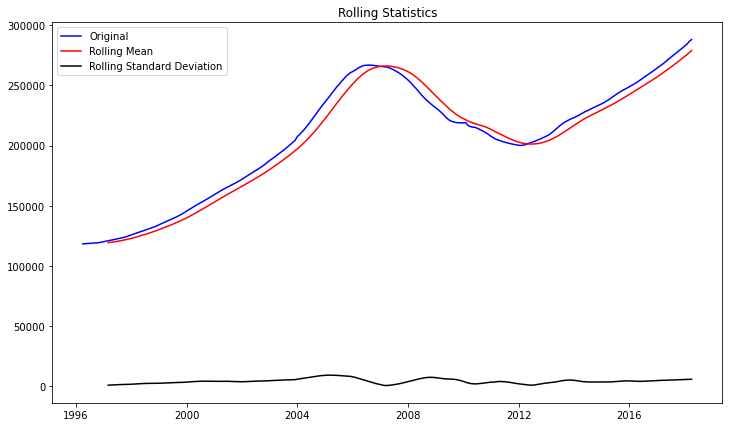

In [94]:
# Plotting the rolling statistics 
fig = plt.figure(figsize=(12,7))
plt.plot(data3, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [95]:
# Dickey-Fuller Test
dftest = adfuller(data3)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Values (1%)            -3.455558
Critical Values (5%)            -2.872636
Critical Values (10%)           -2.572683
dtype: float64


Based on the plot and the p-value, we can see that our data is not stationary. This will be dealt with in the modeling part of this project. 

In [96]:
# A